# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier
#### Steps:
##### Step 1: Load and Preparing The Data Set
1. Load train, validation and test data
2. Convert into a greyscale image
3. Normalize data
4. Dataset Summary: printing number of train, validation and test data
5. Visualize random item of the testing data set alongside it's lable code, check signnames.csv for more information
6. Shuffle the training data to prevent the network from saving a known sequence
7. Set Tensor Flow parameters: EPOCH and BATCH_SIZE values affect the training speed and model accuracy.
##### Step 2: Design and Test a Model Architecture
1. Pre-process the Data Set (normalization, grayscale, etc.)
2. Model Architecture


## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = 'train.p'
validation_file= 'valid.p'
testing_file = 'test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_validation, y_validation = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

In [2]:
# convert into a greyscale image
import numpy as np
from numpy import newaxis

def rgb2gray(rgb):
    r, g, b = rgb[...,0], rgb[...,1], rgb[...,2]
    gray = 0.2989 * r + 0.5870 * g + 0.1140 * b
    gray = gray[..., newaxis]
    return gray

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [3]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of validation examples
n_validation = len(X_validation)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = 43

print("Number of training examples =", n_train)
print("Number of validating examples =", n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of validating examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

In [4]:
import matplotlib as mpl
from matplotlib import pyplot as plt

# got it from the link: https://docs.opencv.org/3.1.0/d5/daf/tutorial_py_histogram_equalization.html
def plotHistogramForImage(image):
    %matplotlib inline
    inline_rc = dict(mpl.rcParams)
    hist,bins = np.histogram(image.flatten(),256,[0,256])
    cdf = hist.cumsum()
    cdf_normalized = cdf * hist.max()/ cdf.max()
    plt.plot(cdf_normalized, color = 'b')
    plt.hist(image.flatten(),256,[0,256], color = 'r')
    plt.xlim([0,256])
    plt.legend(('cdf','histogram'), loc = 'upper left')
    plt.show()
    mpl.rcParams.update(inline_rc)
    
def image_histogram_equalization(image, number_bins=256):
    # from http://www.janeriksolem.net/2009/06/histogram-equalization-with-python-and.html

    # get image histogram
    image_histogram, bins = np.histogram(image.flatten(), number_bins, normed=True)
    cdf = image_histogram.cumsum() # cumulative distribution function
    cdf = 255 * cdf / cdf[-1] # normalize

    # use linear interpolation of cdf to find new pixel values
    image_equalized = np.interp(image.flatten(), bins[:-1], cdf)

    return image_equalized.reshape(image.shape)

(32, 32)


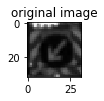

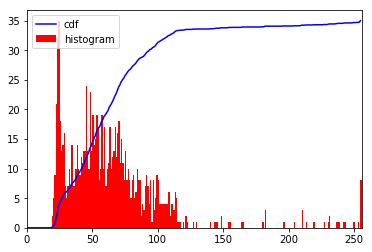

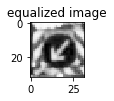

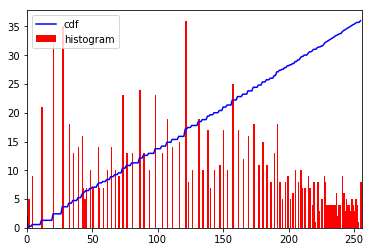

39


In [5]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import random
import numpy as np
from matplotlib import pyplot as plt
# Visualizations will be shown in the notebook.

index = random.randint(0, len(X_train))
image = X_train[index].squeeze() # squeeze()?
image = image[:,:,0]
print(image.shape)
plt.figure(figsize=(1, 1))
plt.title('original image')
plt.imshow(image, cmap='gray')
plt.show()
plt.title('original image histogram')
plotHistogramForImage(image)

equalizedImage = image_histogram_equalization(image)
plt.figure(figsize=(1, 1))
plt.title('equalized image')
plt.imshow(equalizedImage, cmap='gray')
plt.show()
plt.title('equalized image histogram')
plotHistogramForImage(equalizedImage)

print(y_train[index])

### Show the distribution for each class in the training data

[ 180 1980 2010 1260 1770 1650  360 1290 1260 1320 1800 1170 1890 1920  690
  540  360  990 1080  180  300  270  330  450  240 1350  540  210  480  240
  390  690  210  599  360 1080  330  180 1860  270  300  210  210]
[  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.  14.
  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.  28.  29.
  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.  42.  43.]


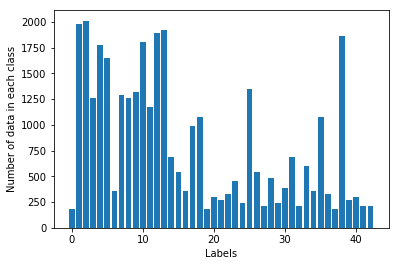

In [6]:
from matplotlib import pyplot as plt
def show_histogram():
    labels_histogram,bins = np.histogram(y_train, 43, [0,43])
    print(labels_histogram)#print number of training data for each class
    print(bins)
    plt.xlabel("Labels")
    plt.ylabel("Number of data in each class")
    plt.bar(bins[0:-1], labels_histogram) #we can use also --> plt.plot(bins[0:-1], hist)  <-- but its output is a curve
    return labels_histogram
labels_histogram = show_histogram()

As shown in the previous cell, the destribution of the data is not fair at all for most of the classes so we need to augment the data that has very low training sample.

### Add helper functions to show images in a matrix

In [7]:
import os
from matplotlib.pyplot import figure, imshow, axis
from matplotlib import pyplot as plt
from matplotlib.image import imread

hSize = 5
wSize = 5
def showImagesMatrix(images_path = None, list_of_image_files = None, list_of_image_titles = None, col=10):
    if not list_of_image_files:
        list_of_image_files = os.listdir(images_path)
    fig = figure( figsize=(wSize, hSize))
    number_of_files = len(list_of_image_files)
    row = number_of_files/col
    if (number_of_files%col != 0):
        row += 1
    for i in range(number_of_files):
        a=fig.add_subplot(row,col,i+1)
        if images_path:
            image = imread(images_path+'/'+list_of_image_files[i])
        else:
            image = list_of_image_files[i]
        if list_of_image_titles:
            plt.title(list_of_image_titles[i])
        imshow(image,cmap='Greys_r')
        axis('off')

### Add helper functions to rotate images

In [8]:
import cv2
import numpy as np
import math

def rotate_image(image, angle):
    """
    Rotates an OpenCV 2 / NumPy image about it's centre by the given angle
    (in degrees). The returned image will be large enough to hold the entire
    new image, with a black background
    """

    # Get the image size
    # No that's not an error - NumPy stores image matricies backwards
    image_size = (image.shape[1], image.shape[0])
    image_center = tuple(np.array(image_size) / 2)

    # Convert the OpenCV 3x2 rotation matrix to 3x3
    rot_mat = np.vstack(
        [cv2.getRotationMatrix2D(image_center, angle, 1.0), [0, 0, 1]]
    )

    rot_mat_notranslate = np.matrix(rot_mat[0:2, 0:2])

    # Shorthand for below calcs
    image_w2 = image_size[0] * 0.5
    image_h2 = image_size[1] * 0.5

    # Obtain the rotated coordinates of the image corners
    rotated_coords = [
        (np.array([-image_w2,  image_h2]) * rot_mat_notranslate).A[0],
        (np.array([ image_w2,  image_h2]) * rot_mat_notranslate).A[0],
        (np.array([-image_w2, -image_h2]) * rot_mat_notranslate).A[0],
        (np.array([ image_w2, -image_h2]) * rot_mat_notranslate).A[0]
    ]

    # Find the size of the new image
    x_coords = [pt[0] for pt in rotated_coords]
    x_pos = [x for x in x_coords if x > 0]
    x_neg = [x for x in x_coords if x < 0]

    y_coords = [pt[1] for pt in rotated_coords]
    y_pos = [y for y in y_coords if y > 0]
    y_neg = [y for y in y_coords if y < 0]

    right_bound = max(x_pos)
    left_bound = min(x_neg)
    top_bound = max(y_pos)
    bot_bound = min(y_neg)

    new_w = int(abs(right_bound - left_bound))
    new_h = int(abs(top_bound - bot_bound))

    # We require a translation matrix to keep the image centred
    trans_mat = np.matrix([
        [1, 0, int(new_w * 0.5 - image_w2)],
        [0, 1, int(new_h * 0.5 - image_h2)],
        [0, 0, 1]
    ])

    # Compute the tranform for the combined rotation and translation
    affine_mat = (np.matrix(trans_mat) * np.matrix(rot_mat))[0:2, :]

    # Apply the transform
    result = cv2.warpAffine(
        image,
        affine_mat,
        (new_w, new_h),
        flags=cv2.INTER_LINEAR
    )

    return result


def largest_rotated_rect(w, h, angle):
    """
    Given a rectangle of size wxh that has been rotated by 'angle' (in
    radians), computes the width and height of the largest possible
    axis-aligned rectangle within the rotated rectangle.

    Original JS code by 'Andri' and Magnus Hoff from Stack Overflow

    Converted to Python by Aaron Snoswell
    """

    quadrant = int(math.floor(angle / (math.pi / 2))) & 3
    sign_alpha = angle if ((quadrant & 1) == 0) else math.pi - angle
    alpha = (sign_alpha % math.pi + math.pi) % math.pi

    bb_w = w * math.cos(alpha) + h * math.sin(alpha)
    bb_h = w * math.sin(alpha) + h * math.cos(alpha)

    gamma = math.atan2(bb_w, bb_w) if (w < h) else math.atan2(bb_w, bb_w)

    delta = math.pi - alpha - gamma

    length = h if (w < h) else w

    d = length * math.cos(alpha)
    a = d * math.sin(alpha) / math.sin(delta)

    y = a * math.cos(gamma)
    x = y * math.tan(gamma)

    return (
        bb_w - 2 * x,
        bb_h - 2 * y
    )


def crop_around_center(image, width, height):
    """
    Given a NumPy / OpenCV 2 image, crops it to the given width and height,
    around it's centre point
    """

    image_size = (image.shape[1], image.shape[0])
    image_center = (int(image_size[0] * 0.5), int(image_size[1] * 0.5))

    if(width > image_size[0]):
        width = image_size[0]

    if(height > image_size[1]):
        height = image_size[1]

    x1 = int(image_center[0] - width * 0.5)
    x2 = int(image_center[0] + width * 0.5)
    y1 = int(image_center[1] - height * 0.5)
    y2 = int(image_center[1] + height * 0.5)

    return image[y1:y2, x1:x2]

def rotate_image_and_crop_black_borders(image, angle):
    image_height, image_width = image.shape[0:2]
    
    rotated_image = rotate_image(image,angle) 
    rotated_image_cropped = crop_around_center(
            rotated_image,
            *largest_rotated_rect(
                image_width,
                image_height,
                math.radians(rotation_angle)
            )
        )
    rotated_image_cropped = cv2.resize(rotated_image_cropped, dsize=(image_width, image_height), interpolation=cv2.INTER_CUBIC)
    return rotated_image_cropped


### Test image rotation

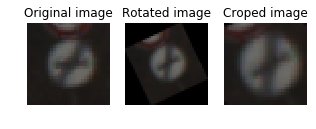

In [9]:
from matplotlib import pyplot as plt

idx = 1
images_list = []
images_titles = []
image = X_train[idx] #get an image from the training set
images_list.append(image)
images_titles.append('Original image')

image_height, image_width = image.shape[0:2]

rotation_angle = 25
rotated_image = rotate_image(image,rotation_angle) 
images_list.append(rotated_image)
images_titles.append('Rotated image')

rotated_image_cropped = rotate_image_and_crop_black_borders(image, rotation_angle)
images_list.append(rotated_image_cropped)
images_titles.append('Croped image')

showImagesMatrix(list_of_image_files = images_list, list_of_image_titles=images_titles, col=3)

### Add helper function to shift images

In [10]:
import cv2
import numpy as np
def shift_image(img, x_shift, y_shift):    
    rows,cols = img.shape[0:2]
    M = np.float32([[1,0,x_shift],[0,1,y_shift]])
    shifted_img = cv2.warpAffine(img,M,(cols,rows))

    cropped_img = shifted_img[y_shift:rows, x_shift:cols]

    resized_img = cv2.resize(cropped_img,(rows, cols), interpolation = cv2.INTER_CUBIC)
    return resized_img

### Test image shift

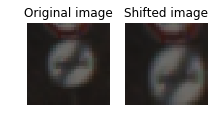

In [11]:
from matplotlib import pyplot as plt
idx = 1
images_list = []
images_titles = []
img = X_train[idx] #get an image from the training set
images_list.append(image)
images_titles.append('Original image')

shifted_img = shift_image(img, 5,8)
images_list.append(shifted_img)
images_titles.append('Shifted image')
showImagesMatrix(list_of_image_files = images_list, list_of_image_titles=images_titles, col=3)

### Steps to augment the data set
For each training sample whose corresponding label has less than 1000 samples do:
 - if the label has less than 500 training samples, create a new rotated image randomly [3:15] and add it to X_train, and add its corresponding label to y_train.
 - if the label has less than 800 training samples, create a new shifted image [2:6] and add it to x_train, and add its corresponding label to y_train.
 - create a new shifted-rotated image and add it to x_train, and add its corresponding label to y_train.

aug shape =  (27688, 1, 32, 32, 3)
aug shape =  (27688, 32, 32, 3)
old x train shape =  (34799, 32, 32, 3)
new x train shape =  (62487, 32, 32, 3)
old y train shape =  (34799,)
new y train shape =  (62487,)
count =  27688
[ 900 1980 2010 1260 1770 1650 1440 1290 1260 1320 1800 1170 1890 1920 2070
 1620 1440 1980 1080  900 1200 1350 1320 1800 1200 1350 1620 1050 1920 1200
 1560 2070 1050 1797 1440 1080 1320  900 1860 1350 1200 1050 1050]
[  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.  14.
  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.  28.  29.
  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.  42.  43.]


array([ 900, 1980, 2010, 1260, 1770, 1650, 1440, 1290, 1260, 1320, 1800,
       1170, 1890, 1920, 2070, 1620, 1440, 1980, 1080,  900, 1200, 1350,
       1320, 1800, 1200, 1350, 1620, 1050, 1920, 1200, 1560, 2070, 1050,
       1797, 1440, 1080, 1320,  900, 1860, 1350, 1200, 1050, 1050])

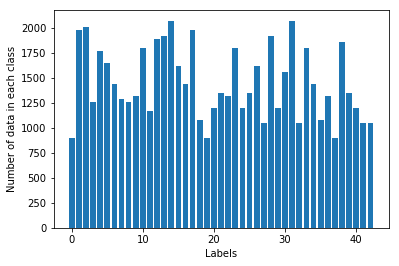

In [12]:
# add the code to augment the trainning data set
from random import randint

def random_image_rotate(image):
    rotation_angle = randint(3, 15)
    rotated_image = rotate_image_and_crop_black_borders(image, rotation_angle)
    return rotated_image

def random_image_shift(image):
    shift_x = randint(2, 6)
    shift_y = randint(2, 6)
    shifted_image = shift_image(image, shift_x, shift_y)
    return shifted_image

def random_image_shift_and_rotate(image):
    rotated_image = random_image_rotate(image)
    shifted_rotated_image = random_image_shift(rotated_image)
    return shifted_rotated_image

x_train_len = len(X_train)
augmented_x_train = []
augmented_y_train = []
count = 0
for idx in range(0, x_train_len):
    image = X_train[idx]
    label = y_train[idx]
    if(labels_histogram[label] < 1000):
        if(labels_histogram[label] < 300):
            count+=1
            rotated_shifted_image = random_image_shift_and_rotate(image)
            augmented_x_train.append([rotated_shifted_image])
            augmented_y_train.append(label)
        if(labels_histogram[label] < 500):
            count+=1
            rotated_image = random_image_shift(image)
            augmented_x_train.append([rotated_image])
            augmented_y_train.append(label)
        if(labels_histogram[label] < 800):
            count+=1
            shifted_image = random_image_shift(image)
            augmented_x_train.append([shifted_image])
            augmented_y_train.append(label)

        count+=1
        rotated_shifted_image = random_image_shift_and_rotate(image)
        augmented_x_train.append([rotated_shifted_image])
        augmented_y_train.append(label)
        
augmented_x_train = np.asarray(augmented_x_train)
print("aug shape = ", augmented_x_train.shape)
augmented_x_train = augmented_x_train[:,0,:,:,:]
print("aug shape = ", augmented_x_train.shape)
print("old x train shape = ", X_train.shape)
X_train = np.concatenate((X_train, augmented_x_train))
print("new x train shape = ", X_train.shape)

augmented_y_train = np.asarray(augmented_y_train)
print("old y train shape = ", y_train.shape)
y_train = np.concatenate((y_train, augmented_y_train))
print("new y train shape = ", y_train.shape)
print("count = ", count)
show_histogram()

### Preprocess Data
Shuffle the training data.

In [13]:
from sklearn.utils import shuffle

X_train, y_train = shuffle(X_train, y_train)

### Setup TensorFlow
The EPOCH and BATCH_SIZE values affect the training speed and model accuracy.

In [14]:
import tensorflow as tf

EPOCHS = 20
BATCH_SIZE = 128

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [15]:
def preProcessInput(input):
    output = rgb2gray(input)
    output = image_histogram_equalization(output)
    output = (output - 128) / 128 #normalize data
    return output

In [16]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.

X_train = preProcessInput(X_train)
X_validation = preProcessInput(X_validation)
X_test = preProcessInput(X_test)
n_channels_in_image = X_train[0].shape[2]

In [17]:
def convolutionFunc(inputLayer, filterSize, inputDepth, outputDepth, mu, stdDev, paddingType):
    conv1_W = tf.Variable(tf.truncated_normal(shape=(filterSize, filterSize, inputDepth, outputDepth), mean = mu, stddev = stdDev))
    conv1_b = tf.Variable(tf.zeros(outputDepth))
    conv1   = tf.nn.conv2d(inputLayer, conv1_W, strides=[1, 1, 1, 1], padding=paddingType) + conv1_b
    
    conv1 = tf.nn.relu(conv1)
    return conv1

def fullyConnectedFunc(inputLayer, inputLayerNum, outputLayerNum, mu, stdDev):
    fc_W  = tf.Variable(tf.truncated_normal(shape=(inputLayerNum, outputLayerNum), mean = mu, stddev = stdDev))
    fc_b  = tf.Variable(tf.zeros(outputLayerNum))
    fc    = tf.matmul(inputLayer, fc_W) + fc_b
    return fc

### Model Architecture

### Input
The LeNet architecture accepts a 32x32xC image as input, where C is the number of color channels. Since Traffic sign images are color, C is 3 in this case.

### Architecture
Layer 1: Convolutional. The output shape should be 28x28x16 using relu activation function.
Layer 2: Convolutional. The output shape should be 28x28x32 using relu activation function.
Pooling. The output shape should be 14x14x32.
Drop out with keep probability = 0.9

Layer 3: Convolutional. The output shape should be 10x10x64 using relu activation function.
Layer 4: Convolutional. The output shape should be 10x10x128 using relu activation function.
Pooling. The output shape should be 5x5x128.
Drop out with keep probability = 0.8

Flatten. Flatten the output shape (3200) of the final pooling layer such that it's 1D instead of 3D. The easiest way to do is by using tf.contrib.layers.flatten, which is already imported.

Layer 5: Fully Connected. This should have 2400 outputs.
Activation. Relu activation function.
Drop out with keep probability = 0.7

Layer 6: Fully Connected. This should have 1600 outputs.
Activation. Relu activation function.
Drop out with keep probability = 0.6

Layer 7: Fully Connected. This should have 800 outputs.
Activation. Relu activation function.
Drop out with keep probability = dropout variable passed as a parameter to the LeNet function

Layer 8: Fully Connected (Logits). This should have 43 outputs.

In [18]:
from tensorflow.contrib.layers import flatten

def LeNet(x, dropout):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    # SOLUTION: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x16.
    conv1 = convolutionFunc(x, 5, n_channels_in_image, 16, mu, sigma, 'VALID')
    # SOLUTION: Layer 2: Convolutional. Input = 28x28x16. Output = 28x28x32.
    conv2 = convolutionFunc(conv1, 5, 16, 32, mu, sigma, 'SAME')
    # SOLUTION: Pooling. Input = 28x28x32. Output = 14x14x32.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    if 1 != dropout:
        conv2 = tf.nn.dropout(conv2, 0.9)
        
    # SOLUTION: Layer 3: Convolutional.  Input = 14x14x32 Output = 10x10x64.
    conv3  =convolutionFunc(conv2, 5, 32, 64, mu, sigma, 'VALID')
    # SOLUTION: Layer 4: Convolutional.  Input = 10x10x64 Output = 10x10x128.
    conv4  =convolutionFunc(conv3, 5, 64, 128, mu, sigma, 'SAME')
    # SOLUTION: Pooling. Input = 10x10x128. Output = 5x5x128.
    conv4 = tf.nn.max_pool(conv4, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    if 1 != dropout:
        conv4 = tf.nn.dropout(conv4, 0.8)
    
    # SOLUTION: Flatten. Input = 5x5x128. Output = 3200.
    fc0   = flatten(conv4)
    
    # SOLUTION: Layer 5: Fully Connected. Input = 3200. Output = 2400.
    fc1 = fullyConnectedFunc(fc0, 3200, 2400, mu, sigma)
    # SOLUTION: Activation.
    fc1 = tf.nn.relu(fc1)
    if 1 != dropout:
        fc1 = tf.nn.dropout(fc1, 0.7)
    
    # SOLUTION: Layer 6: Fully Connected. Input = 2400. Output = 1600.
    fc2 = fullyConnectedFunc(fc1, 2400, 1600, mu, sigma)
    # SOLUTION: Activation.
    fc2    = tf.nn.relu(fc2)
    if 1 != dropout:
        fc2 = tf.nn.dropout(fc2, 0.6)  
    
    # SOLUTION: Layer 7: Fully Connected. Input = 1600. Output = 800.
    fc3 = fullyConnectedFunc(fc2, 1600, 800, mu, sigma)
    # SOLUTION: Activation.
    fc3    = tf.nn.relu(fc3)
    fc3 = tf.nn.dropout(fc3, dropout)
    
    # SOLUTION: Layer 8: Fully Connected. Input = 800. Output = 43.
    logits = fullyConnectedFunc(fc3, 800, 43, mu, sigma)
    
    return logits

### Features and Labels
Train LeNet to classify traffic sign data.

x is a placeholder for a batch of input images. y is a placeholder for a batch of output labels.

In [19]:
import tensorflow as tf
x = tf.placeholder(tf.float32, (None, 32, 32, n_channels_in_image))
y = tf.placeholder(tf.int32, (None))
keep_prob = tf.placeholder(tf.float32)
one_hot_y = tf.one_hot(y, 43)

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [20]:
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.

In [21]:
rate = 0.001
### Train your model here.
logits = LeNet(x, keep_prob)
### Calculate and report the accuracy on the training and validation set.
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

### Model Evaluation
Evaluate how well the loss and accuracy of the model for a given dataset.

In [22]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 1.0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

### Train the Model
Run the training data through the training pipeline to train the model.

Before each epoch, shuffle the training set.

After each epoch, measure the loss and accuracy of the validation set.

Save the model after training.

In [ ]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 0.5})
            
        validation_accuracy = evaluate(X_validation, y_validation)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, './lenet')
    print("Model saved")

---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

In [23]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 0.939


### Load and Output the Images

In [24]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

#load the signnames.csv into a dictionary called signesDict
f = open("signnames.csv", "r")
lines = f.read().split("\n") # "\r\n" if needed
signesDict = {}
for line in lines:
    if line != "": # add other needed checks to skip titles
        cols = line.split(",")
        signesDict[cols[0]] = cols[1]
print(signesDict)

{'27': 'Pedestrians', '18': 'General caution', '12': 'Priority road', '20': 'Dangerous curve to the right', '17': 'No entry', '7': 'Speed limit (100km/h)', '38': 'Keep right', '26': 'Traffic signals', '33': 'Turn right ahead', '6': 'End of speed limit (80km/h)', '9': 'No passing', '2': 'Speed limit (50km/h)', '42': 'End of no passing by vehicles over 3.5 metric tons', '41': 'End of no passing', '14': 'Stop', '34': 'Turn left ahead', '4': 'Speed limit (70km/h)', '23': 'Slippery road', '13': 'Yield', '32': 'End of all speed and passing limits', '29': 'Bicycles crossing', '16': 'Vehicles over 3.5 metric tons prohibited', '28': 'Children crossing', '5': 'Speed limit (80km/h)', '1': 'Speed limit (30km/h)', '36': 'Go straight or right', '22': 'Bumpy road', '10': 'No passing for vehicles over 3.5 metric tons', '15': 'No vehicles', '8': 'Speed limit (120km/h)', 'ClassId': 'SignName', '40': 'Roundabout mandatory', '35': 'Ahead only', '30': 'Beware of ice/snow', '19': 'Dangerous curve to the lef

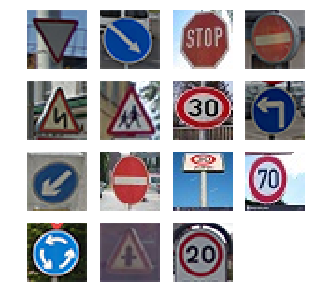

In [27]:
# load images from the hard disk
col = 4
images_path = "Testing_images/"
showImagesMatrix(images_path = images_path, col = col)

In [28]:
def print_top_five_probabilities_from_output_logits(outputLogits):
    outputTuples = get_top_five_probabilites_from_output_logits(outputLogits)
    signNames = []
    probabilities = []
    for outputTuple in outputTuples:
        probabilities.append(outputTuple[0] *100)
        signNames.append(outputTuple[1])        
        print(outputTuple[1]," : ", outputTuple[0])
    
    plt.xlabel("Output classes names")
    plt.ylabel("Propability")
    signIndices = list(range(0, len(signNames)))
    plt.xticks(signIndices, signNames, rotation=90)
    plt.bar(signIndices, probabilities) #we can use also --> plt.plot(bins[0:-1], hist)  <-- but its output is a curve
    plt.show()

def get_top_five_probabilites_from_output_logits(outputLogits):
    outputTuple = []
    for i in range(0, len(outputLogits)):
        outputTuple.append((outputLogits[i], signesDict[str(i)]))
    
    outputTuple.sort(key=lambda tup: tup[0], reverse = True)#inplace sort
    outputTuple = outputTuple[0:5]
    return outputTuple

### Predict the Sign Type for Each Image

Expected output class :  Yield


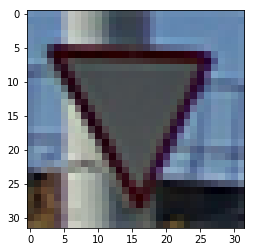

Yield  :  1.0
Speed limit (30km/h)  :  1.72474e-22
Speed limit (80km/h)  :  4.29885e-23
No passing  :  2.49421e-23
Ahead only  :  3.26914e-24


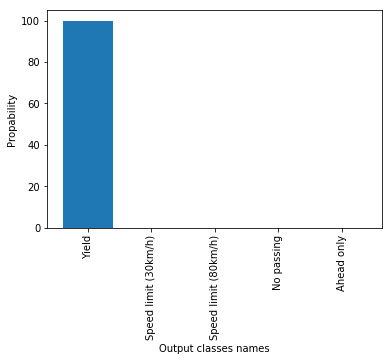

is classified correctly :  True
........................................................................

Expected output class :  Keep right


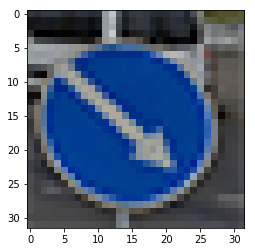

Keep right  :  0.998882
Roundabout mandatory  :  0.00108314
Turn left ahead  :  3.15363e-05
Priority road  :  3.06902e-06
Vehicles over 3.5 metric tons prohibited  :  2.40451e-08


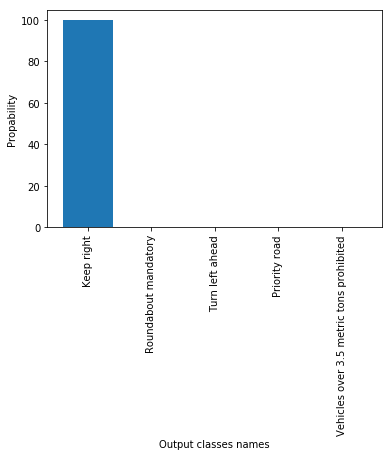

is classified correctly :  True
........................................................................

Expected output class :  Stop


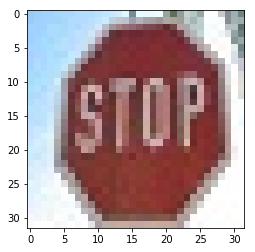

Stop  :  1.0
No entry  :  9.96325e-09
General caution  :  3.58824e-09
Keep right  :  1.57392e-09
Speed limit (60km/h)  :  6.88258e-10


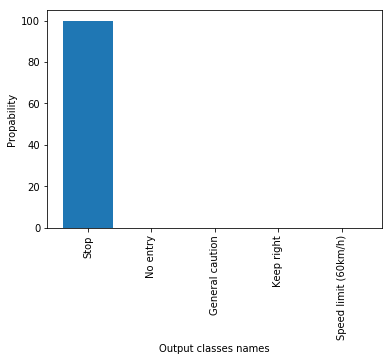

is classified correctly :  True
........................................................................

Expected output class :  No entry


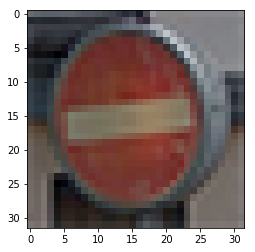

No entry  :  0.431692
Turn right ahead  :  0.150131
Stop  :  0.10975
Turn left ahead  :  0.0954631
No passing  :  0.0434363


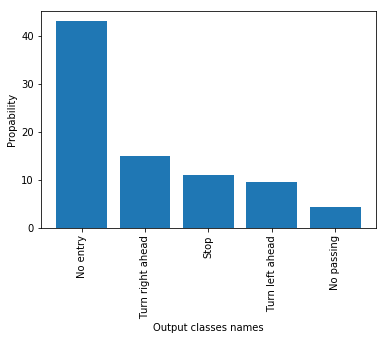

is classified correctly :  True
........................................................................

Expected output class :  Double curve


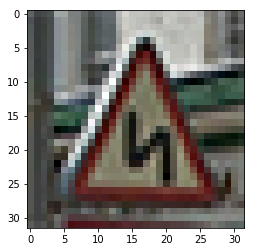

Children crossing  :  0.999882
Yield  :  0.000117502
Ahead only  :  1.084e-08
Turn left ahead  :  1.06441e-09
Road work  :  9.00006e-10


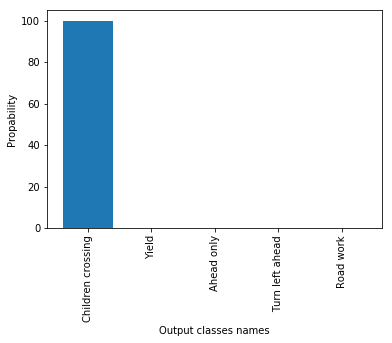

is classified correctly :  False
........................................................................

Expected output class :  Children crossing


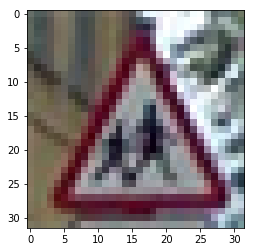

Children crossing  :  0.705313
Pedestrians  :  0.294479
Right-of-way at the next intersection  :  0.000198873
Dangerous curve to the right  :  8.68779e-06
Roundabout mandatory  :  1.34903e-07


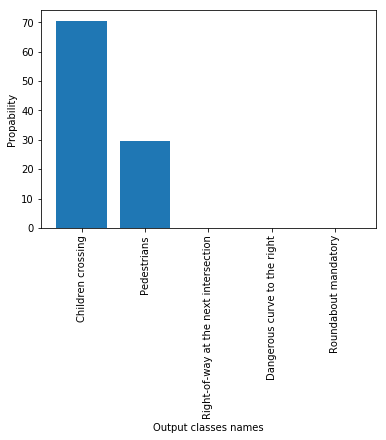

is classified correctly :  True
........................................................................

Expected output class :  Speed limit (30km/h)


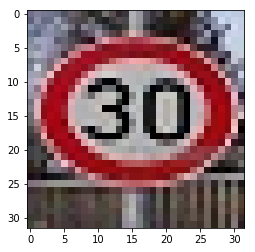

Speed limit (30km/h)  :  0.998701
Children crossing  :  0.00100802
Speed limit (20km/h)  :  0.000102672
Slippery road  :  7.69078e-05
Bicycles crossing  :  2.42195e-05


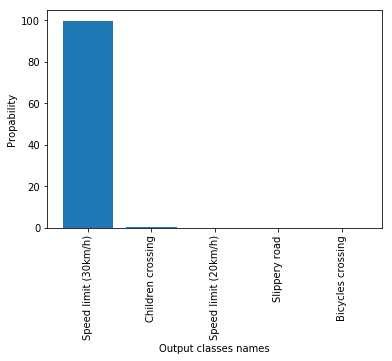

is classified correctly :  True
........................................................................

Expected output class :  Turn left ahead


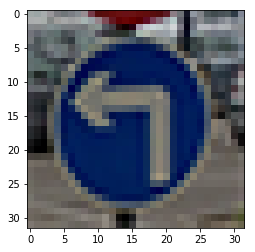

Turn left ahead  :  1.0
Roundabout mandatory  :  4.6205e-28
No vehicles  :  4.04016e-28
Speed limit (30km/h)  :  1.35517e-29
Priority road  :  1.1905e-30


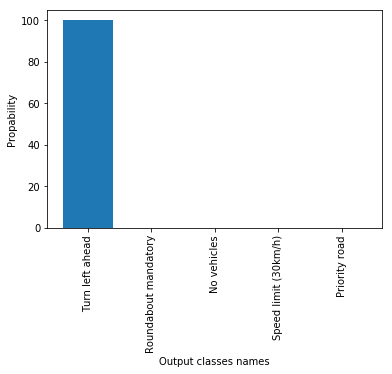

is classified correctly :  True
........................................................................

Expected output class :  Keep left


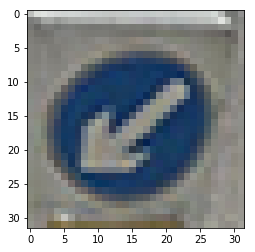

Keep left  :  1.0
Stop  :  1.34841e-38
Speed limit (20km/h)  :  0.0
Speed limit (30km/h)  :  0.0
Speed limit (50km/h)  :  0.0


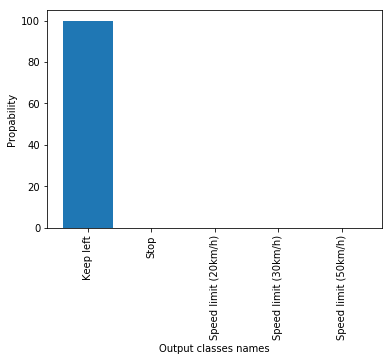

is classified correctly :  True
........................................................................

Expected output class :  No entry


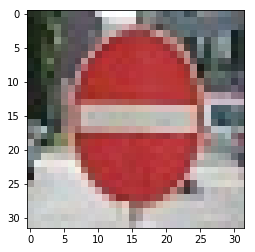

No entry  :  1.0
Speed limit (100km/h)  :  2.19436e-28
No passing for vehicles over 3.5 metric tons  :  4.85558e-29
Stop  :  2.87902e-30
Go straight or left  :  5.7812e-31


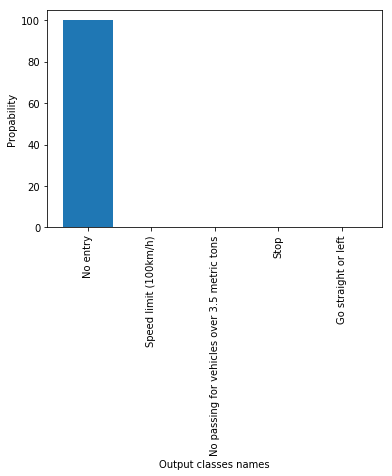

is classified correctly :  True
........................................................................

Expected output class :  Speed limit (30km/h)


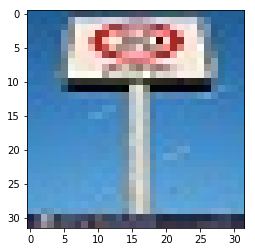

Bicycles crossing  :  1.0
Ahead only  :  4.00839e-09
Children crossing  :  2.37187e-10
Road narrows on the right  :  4.99577e-11
No vehicles  :  2.02992e-11


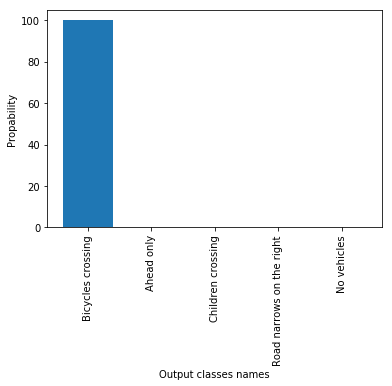

is classified correctly :  False
........................................................................

Expected output class :  Speed limit (70km/h)


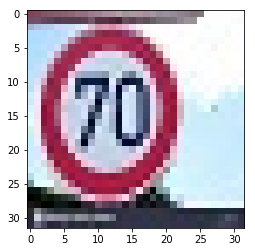

Yield  :  0.290634
Stop  :  0.177064
Speed limit (80km/h)  :  0.0775844
Wild animals crossing  :  0.0509807
Slippery road  :  0.0434131


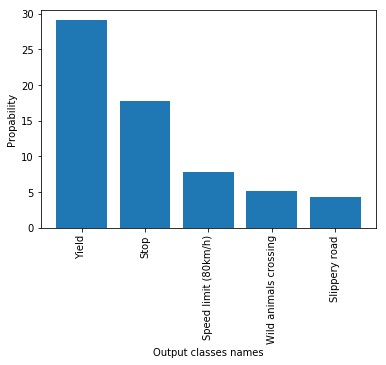

is classified correctly :  False
........................................................................

Expected output class :  Roundabout mandatory


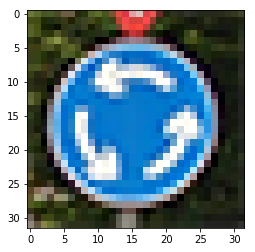

Roundabout mandatory  :  0.98199
Priority road  :  0.0178124
Vehicles over 3.5 metric tons prohibited  :  0.000188364
No entry  :  4.48098e-06
End of no passing by vehicles over 3.5 metric tons  :  3.7783e-06


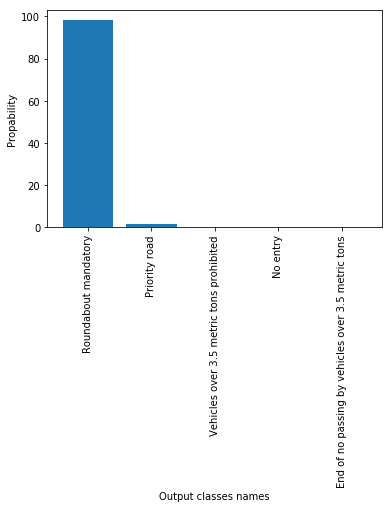

is classified correctly :  True
........................................................................

Expected output class :  Right-of-way at the next intersection


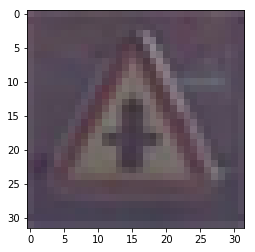

Right-of-way at the next intersection  :  1.0
Pedestrians  :  2.76482e-12
End of no passing by vehicles over 3.5 metric tons  :  2.19331e-13
Priority road  :  5.68144e-14
Roundabout mandatory  :  1.35966e-14


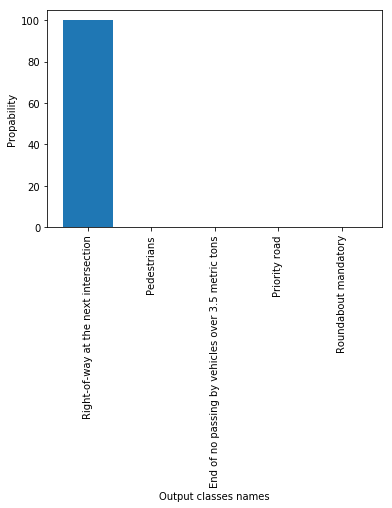

is classified correctly :  True
........................................................................

Expected output class :  Speed limit (20km/h)


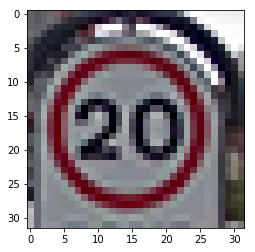

Road work  :  0.865649
Go straight or left  :  0.0780333
Turn left ahead  :  0.0380232
Keep left  :  0.00714558
Speed limit (30km/h)  :  0.00499695


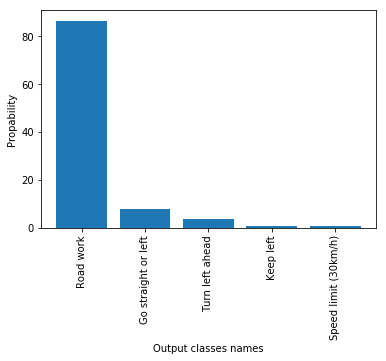

is classified correctly :  False
........................................................................



In [59]:
from PIL import Image
import numpy as np
from numpy import newaxis

import matplotlib.image as mpimg
from matplotlib import pyplot as plt

def get_list_of_test_images_from_dir(images_path):
    list_of_images = []
    list_of_image_files = os.listdir(images_path)
    number_of_files = len(list_of_image_files)
    for i in range(number_of_files):
        image = imread(images_path+'/'+list_of_image_files[i])
        list_of_images.append(image)
    return list_of_images

def get_network_predictions_for_image(img):
    processed_image = preProcessInput(img)
    processed_image = processed_image[newaxis,...]

    networkOutput = tf.nn.softmax(logits=logits)
    with tf.Session() as sess:
        saver.restore(sess, tf.train.latest_checkpoint('.'))
        output = sess.run(networkOutput, feed_dict={x: processed_image , keep_prob: 1.0})
        output = output[0]
    return output

list_of_images = get_list_of_test_images_from_dir(images_path)            
expected_output_dict = {"Traffic_Sign_09.png" : 13
                       , "Traffic_Sign_08.png" : 38
                       , "Traffic_Sign_03.png" : 17
                       , "Traffic_Sign_01.png" : 21
                       , "Traffic_Sign_06.png" : 28
                       , "Traffic_Sign_05.png" : 34
                       , "Traffic_Sign_02.png" : 39
                       , "Traffic_Sign_04.png" : 40
                       , "Traffic_Sign_10.png" : 11
                       , "Traffic_Sign_07.png" : 0
                       , "Traffic_Sign_11.png" : 1
                       , "Traffic_Sign_12.png" : 1
                       , "Traffic_Sign_13.png" : 4
                       , "Traffic_Sign_14.png" : 14
                       , "Traffic_Sign_15.png" : 17}
list_of_image_names = os.listdir(images_path)
number_of_images_classified_correctly = 0
for idx in range(0, len(list_of_images)):
    img = list_of_images[idx]
    image_name = list_of_image_names[idx]
    expected_out_class = expected_output_dict[image_name]
    print("Expected output class : ", signesDict[str(expected_out_class)])
    plt.imshow(img, cmap='gray')
    plt.show()
    logits_output = get_network_predictions_for_image(img)
    logits_max_class = logits_output.tolist().index(max(logits_output))
    print_top_five_probabilities_from_output_logits(logits_output)
    is_classified_correctly = logits_max_class == expected_output_dict[image_name]
    if is_classified_correctly:
        number_of_images_classified_correctly += 1
    print("is classified correctly : ", is_classified_correctly)
    print("........................................................................\n")


### Analyze Performance

In [60]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.
print("Total performance for the tested images : " , number_of_images_classified_correctly / len(list_of_images) * 100 , " %")

Total performance for the tested images :  73.33333333333333  %


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [ ]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [61]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")